## AB Testing of an Online Education Website
AB Testing Exercise - By Sri Harsha Manjunath
[LinkedIn](https://www.linkedin.com/in/srmanj), [Portfolio](https://srmanj.github.io)

Udacity is a popular online learning website where users sign up for courses, gain certifications and get educated in the process. The goal of such a business model is to create an eco-system for the best user & coach experience in order to maximize course completions of the users and as a result generate revenue.

The following cells show the intricacies of an AB Test experiment that aims to improve student, coach experience by improving retention & Net Conversion

The notebook is organized as follows 
1. Problem Statement
    - Current and Proposed conditions
2. Solution Hypothesis
3. Metric Choice

 ### Problem Statement - 
#### Current Conditions (Control Group Conditions) 
1. At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials".
2. If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first.
3. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


#### Proposed  Conditions (Experiment/Treatment Group Conditions)
1. In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course.
2. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free.
3. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.

### Solution Hypothesis - 
The new interface will help set clearer expectations for students from the get go, thereby reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. 
If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

In [3]:
import numpy as np

### Metrics Choice

#### Metrics Available - 
1.  **Number of cookies:** Number of unique cookies to view the course overview page. (dmin=3000)
    - `Invariant Metric `
- **Number of user-ids:** Number of users who enroll in the free trial. (dmin=50)
    - `Evaluation Metric` - *Although not very granular, it is definitely something we want to track* 
- **Number of clicks:** Number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is triggered). (dmin=240)
    - `Invariant Metric` - *Since this metric tracks an event that transpires before our treatment it should not change*
- **Click-through-probability:** Number of unique cookies to click the "*Start free trial*" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
    - `Invariant Metric` - Same reason as the previous one
- **Gross conversion:** Number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
    - `Evaluation Metric` - This should be one of our primary signal to indicate the effect of the treatment
- **Retention:** Number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
    - `'Evaluation Metric` - This should again be considered for one of our primary signals to track
- **Net conversion:** Number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)
    - `Invariant Metric` - Since the users who were prone to not staying beyond the 14-day period would be detered by our treatment, we should see the same number of people staying beyond the 14-day period and the same number of people clicking on the Start-Free Trail Button

#### Some Considerations - 
Metrics, on a broad level can be classifed into 2 classes depending on their behavior across the control & experiment groups
1. **Invariant Metrics** - Metrics that do not/should not change across control and experiemnt groups
2. **Evaluation Metrics** - Metrics you track and want to observe change across the control & experiment groups


In this use case, I decided to choose the following as the Evaluation Metric
1. Gross Conversion
2. Retention
3. Net Conversion

### Computing the Variance of the chosen Evaluation Metrics - 

Analytically estimating the Standard Deviation (Standard Error) of the chosen metrics - 

Given some of the baseline values - 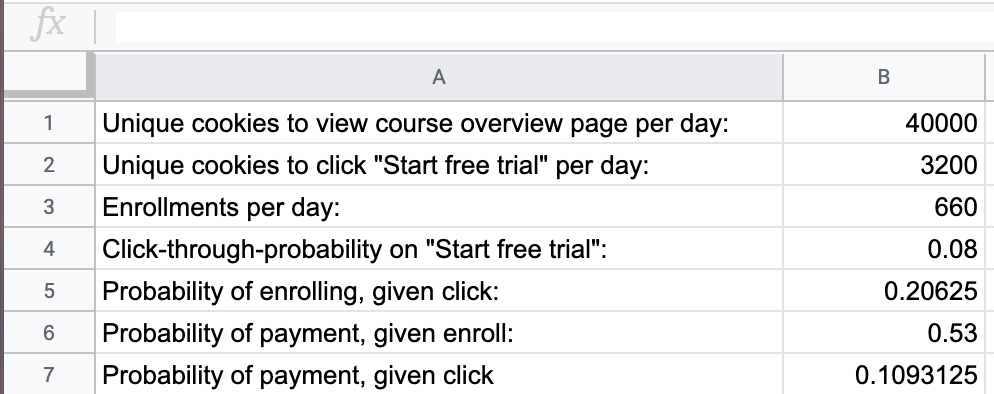

We can compute the standard error of the metrics as 

$ \sqrt{\hat p(1-\hat p)\over N}$

**1. Gross Conversion**

In [8]:
P_Enroll_Click = 0.20625
n = 3200/8
GC_SE = np.sqrt(P_Enroll_Click * (1-P_Enroll_Click)/n)
np.round(GC_SE,5)

0.02023

**2. Retention**

In [9]:
P_Payment_Enroll = 0.53
n = 660/8
Ret_SE = np.sqrt(P_Payment_Enroll * (1-P_Payment_Enroll)/n)
np.round(Ret_SE,5)

0.05495

**3. Net Conversion**

In [10]:
P_Payment_Click = 0.1093125
n = 3200/8
NC_SE = np.sqrt(P_Payment_Click * (1-P_Payment_Click)/n)
np.round(NC_SE,5)

0.0156

### Computing the Size of the Experiment

One of the interesting parts of running an A/B Test is to size 
the experiment.

The Size is dependent on a couple of factors like
- Baseline Conversion Rate
- Minimum Detectable Effect
- Sensitivity $\beta$
- Significance Level $\alpha$

I will be using this - [Sample Size Calculator](https://www.evanmiller.org/ab-testing/sample-size.html) to compute the numbers for the 3 metrics considered

**1. Gross Conversion** 
- Basline Conversion Rate - 0.20625
- Minimum Detectable Effect - 0.01
- Sensitivity - 0.8
- Significance Level - 0.05

**Sample Size = 25,835**

**2. Retention** 
- Basline Conversion Rate - 0.53
- Minimum Detectable Effect - 0.01
- Sensitivity - 0.8
- Significance Level - 0.05

**Sample Size = 39,115**

**2. Net Conversion** 
- Basline Conversion Rate - 0.1093125
- Minimum Detectable Effect - 0.0075
- Sensitivity - 0.8
- Significance Level - 0.05

**Sample Size = 27,413**
